# MDS, NK cells

EG46 and EG47 samples were collected at MDS diagnosis, and EG48 and EG49 are corresponding samples after proggression to AML.

In this notebook samples are merged together (after which NK cell cluster is defined and NK cells are selected for further analysis). UMAPs are generated based on RNA, proteins or latent space. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG46_norm.h5ad')

In [3]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG47_norm.h5ad')

In [4]:
#Easigenomics dataset, only one sample

adata2 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG48_norm.h5ad')

In [5]:
#Easigenomics dataset, only one sample

adata3 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG49_norm.h5ad')

In [ ]:
#Easigenomics dataset, only one sample

adata3 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG49_norm.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 2064 × 12148
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [7]:
adata1

AnnData object with n_obs × n_vars = 3523 × 13827
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
adata2

AnnData object with n_obs × n_vars = 1734 × 13679
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata3

AnnData object with n_obs × n_vars = 2111 × 14711
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden_r1_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [10]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [11]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

In [12]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata2, use_rep="X_totalVI")    

sc.tl.umap(adata2)

In [13]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata3, use_rep="X_totalVI")    

sc.tl.umap(adata3)

EG46


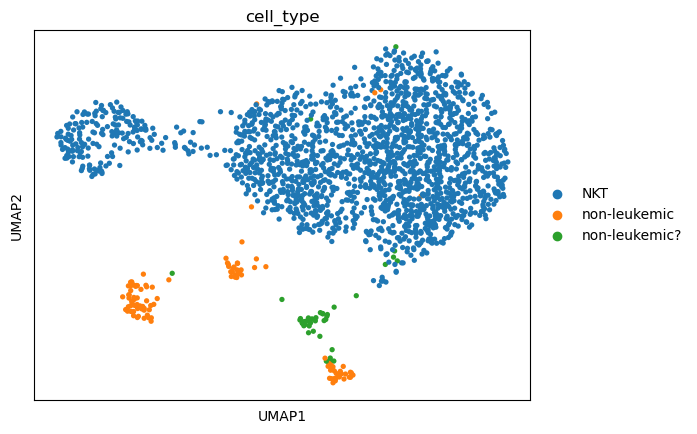

EG47


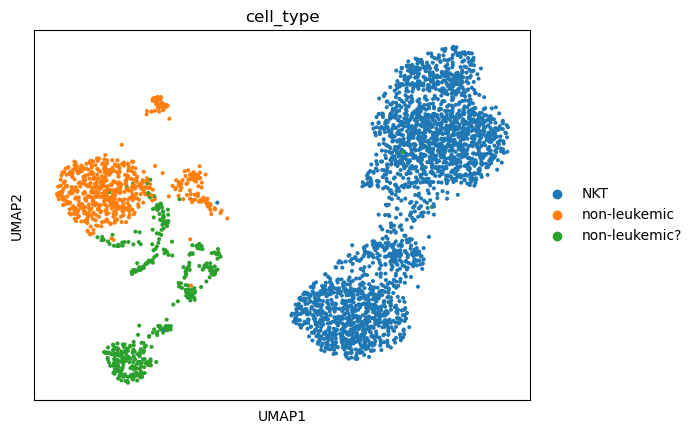

EG48


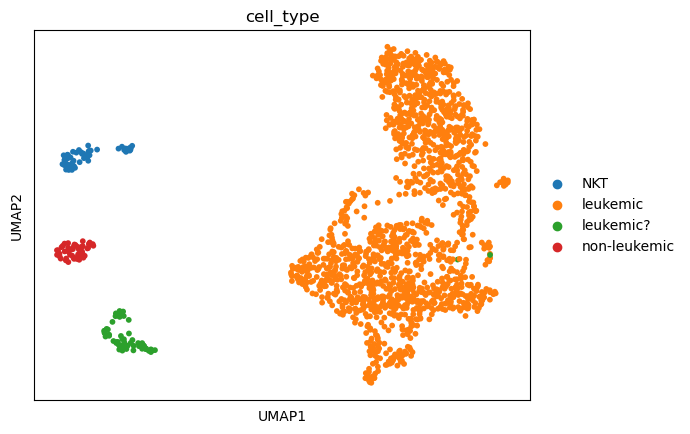

EG49


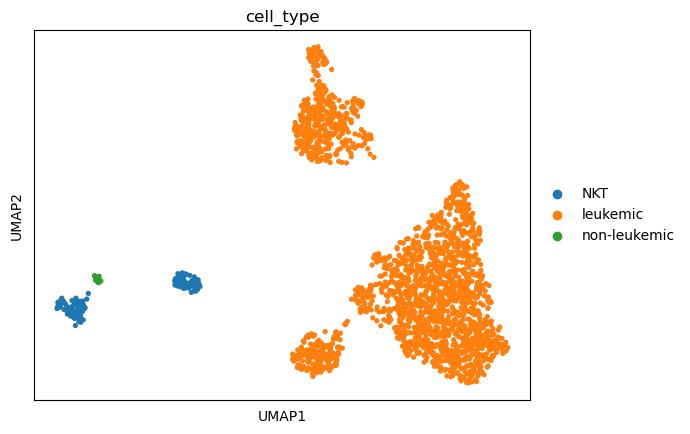

In [14]:
#latent space

print("EG46")
sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

print("EG47")
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

print("EG48")
sc.pl.umap(adata2, color = ['cell_type'], color_map = 'viridis')

print("EG49")
sc.pl.umap(adata3, color = ['cell_type'], color_map = 'viridis')

In [15]:
adata_merged = adata.concatenate(adata1, adata2, adata3, index_unique=None)

In [16]:
adata_merged.obs['cell_type']

AAACCTGCAGTTCATG-1-111              NKT
AAACCTGGTGCACGAA-1-111              NKT
AAACGGGAGGCCGAAT-1-111    non-leukemic?
AAACGGGAGGCTACGA-1-111              NKT
AAACGGGAGTCAAGGC-1-111              NKT
                              ...      
TTTGGTTTCGGCTTGG-1-116         leukemic
TTTGGTTTCTATCGCC-1-116         leukemic
TTTGTCAAGAAGAAGC-1-116         leukemic
TTTGTCACAGTTAACC-1-116         leukemic
TTTGTCATCCAGAGGA-1-116         leukemic
Name: cell_type, Length: 9432, dtype: object

In [17]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [18]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [19]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [20]:
adata_merged

AnnData object with n_obs × n_vars = 9432 × 11500
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm

In [21]:
#save the file!

#adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/MDS-AML_norm.h5ad')

In [22]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

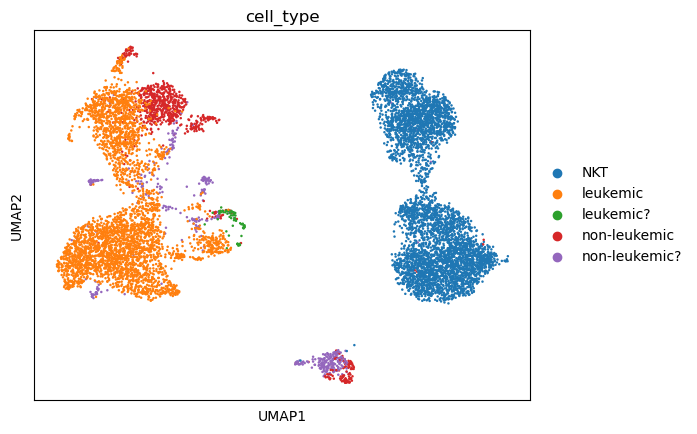

In [23]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

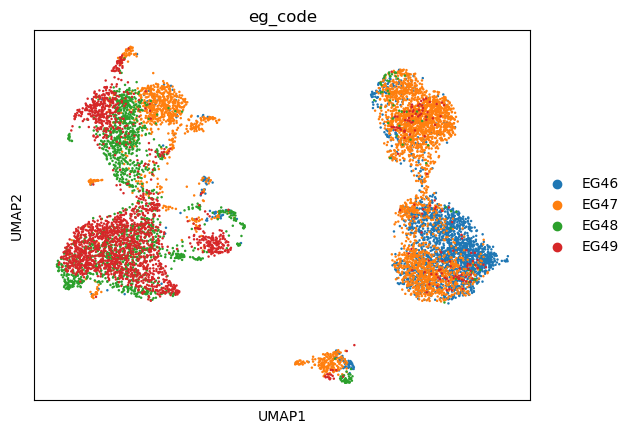

In [24]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [25]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [26]:
sc.tl.leiden(adata_merged, resolution = 0.2, key_added = "leiden_0.2")

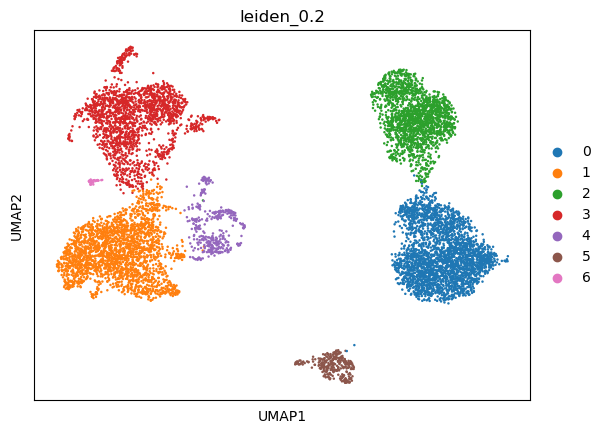

In [27]:
sc.pl.umap(adata_merged, color=['leiden_0.2'], ncols =3)

In [28]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [29]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



FGFBP2
FCGR3A
S1PR5
KLRD1
GNLY
GZMB
CX3CR1
GPR56
PRF1
KLRB1
SPON2
NKG7
TTC38
FCRL6
LILRB1
PLAC8
MBP


In [30]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




NCAM1
GZMA
KLRB1
GZMH
B2M
HLA-DRA
OAS3
MX1
IRF7
MX2
IRF9
OAS1
OAS2
EIF2AK2
TNFRSF18
TNFRSF4
CRTAM
HAVCR2
TIGIT
TNFSF10
BCL2L11
CCL3
CCL4
TNF
IFNG
CD69


In [31]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['FGFBP2',
 'FCGR3A',
 'S1PR5',
 'KLRD1',
 'GNLY',
 'GZMB',
 'CX3CR1',
 'GPR56',
 'PRF1',
 'KLRB1',
 'SPON2',
 'NKG7',
 'TTC38',
 'FCRL6',
 'LILRB1',
 'PLAC8',
 'MBP',
 'NCAM1',
 'GZMA',
 'KLRB1',
 'GZMH',
 'B2M',
 'HLA-DRA',
 'OAS3',
 'MX1',
 'IRF7',
 'MX2',
 'IRF9',
 'OAS1',
 'OAS2',
 'EIF2AK2',
 'TNFRSF18',
 'TNFRSF4',
 'CRTAM',
 'HAVCR2',
 'TIGIT',
 'TNFSF10',
 'BCL2L11',
 'CCL3',
 'CCL4',
 'TNF',
 'IFNG',
 'CD69']

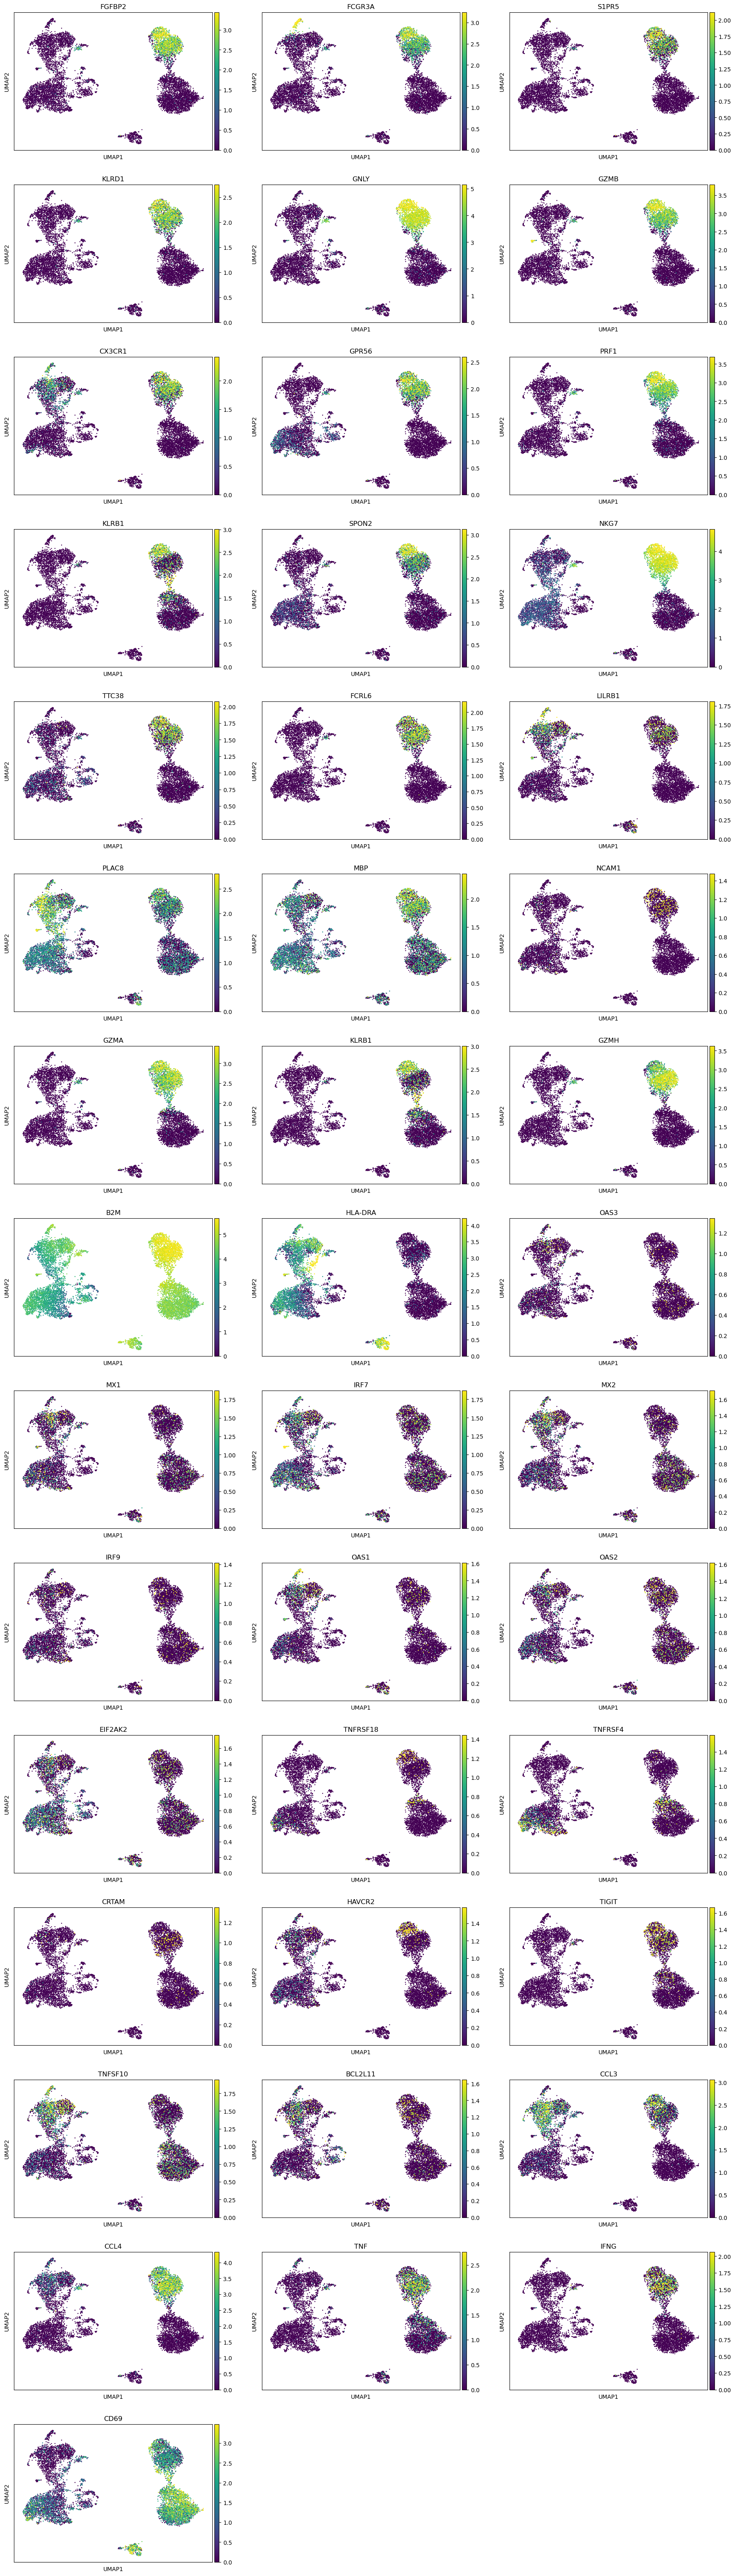

In [32]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

- Based on marker genes, cluster 2 represents NK cells

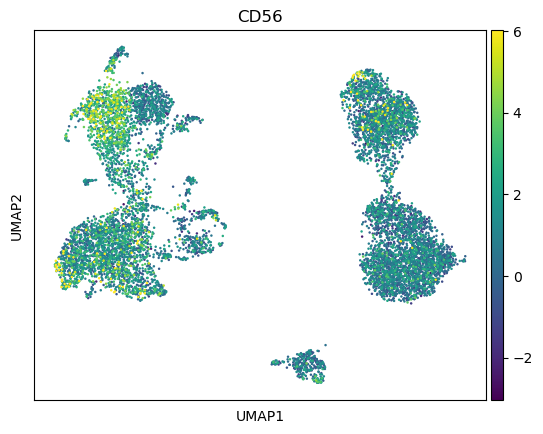

In [33]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

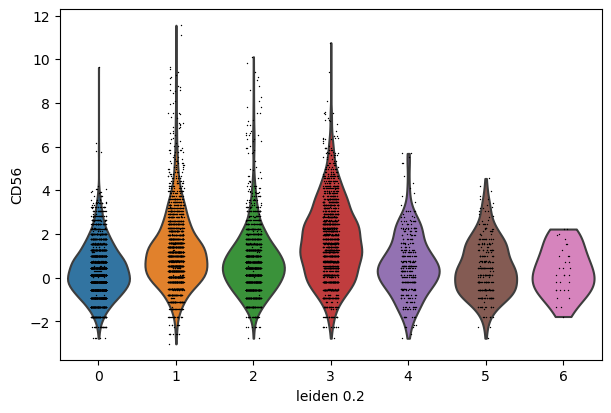

In [34]:
sc.pl.violin(adata_merged, ['CD56'], groupby='leiden_0.2')

In [35]:
#selecting NK cell cluster
adata_nk = adata_merged[adata_merged.obs['leiden_0.2'] == "2"]

In [36]:
adata_nk

View of AnnData object with n_obs × n_vars = 1824 × 11500
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_0.2'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions

In [38]:
adata_nk_eg46 = adata_nk[adata_nk.obs['eg_code'] == "EG46"]

adata_nk_eg47 = adata_nk[adata_nk.obs['eg_code'] == "EG47"]

adata_nk_eg48 = adata_nk[adata_nk.obs['eg_code'] == "EG48"]

adata_nk_eg49 = adata_nk[adata_nk.obs['eg_code'] == "EG49"]

In [40]:
adata_nk_eg46.shape

(193, 11500)

In [41]:
adata_nk_eg47.shape

(1532, 11500)

In [42]:
adata_nk_eg48.shape

(42, 11500)

In [43]:
adata_nk_eg49.shape

(57, 11500)

In [46]:
listOfmarkers= ["TET2"]
TET = []

for x in listOfmarkers:
    if x in adata_nk_eg47.var_names:
        print(x)
        TET.append(x)

TET2


In [52]:
adata_nk_eg47_x = adata_nk_eg47.to_df()

adata_nk_eg46_x = adata_nk_eg46.to_df()

adata_nk_eg48_x = adata_nk_eg48.to_df()

adata_nk_eg49_x = adata_nk_eg49.to_df()

In [53]:
adata_nk_eg47_x['TET2']

AAACCTGCAGTATAAG-1-145    0.000000
AAACCTGGTCAATGTC-1-145    0.000000
AAACCTGTCGACGGAA-1-145    0.000000
AAACCTGTCGGAAATA-1-145    0.000000
AAACCTGTCGTCACGG-1-145    1.468392
                            ...   
TTTGCGCTCGTCTGAA-1-145    0.000000
TTTGGTTCAGTAAGCG-1-145    0.000000
TTTGGTTGTTAAGACA-1-145    0.000000
TTTGTCACACCGGAAA-1-145    0.000000
TTTGTCATCAAAGTAG-1-145    0.000000
Name: TET2, Length: 1532, dtype: float32

<AxesSubplot: xlabel='TET2', ylabel='Density'>

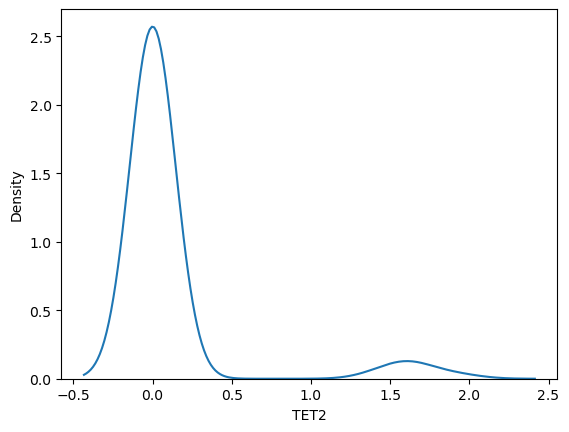

In [75]:
sns.kdeplot(adata_nk_eg46_x['TET2'])

<AxesSubplot: xlabel='TET2', ylabel='Density'>

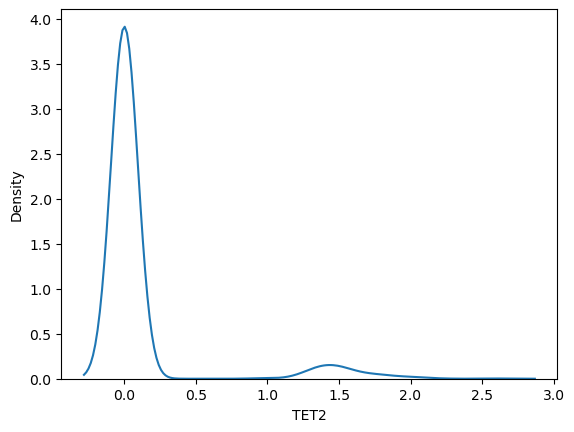

In [76]:
sns.kdeplot(adata_nk_eg47_x['TET2'])

<AxesSubplot: xlabel='TET2', ylabel='Density'>

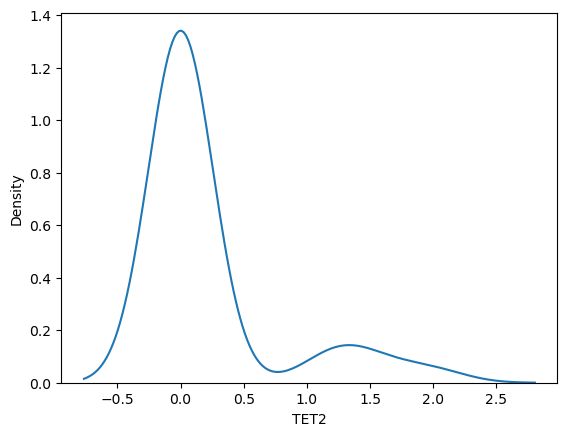

In [77]:
sns.kdeplot(adata_nk_eg48_x['TET2'])

<AxesSubplot: xlabel='TET2', ylabel='Density'>

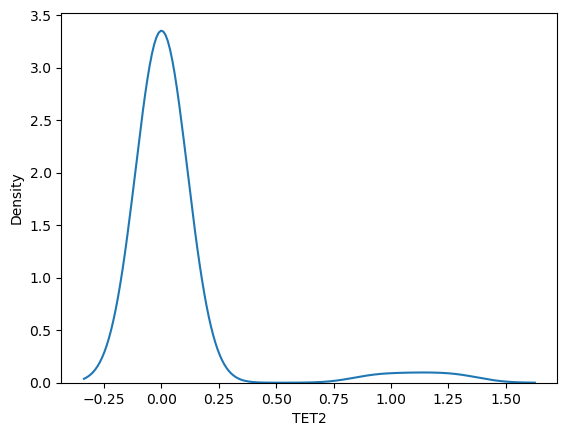

In [78]:
sns.kdeplot(adata_nk_eg49_x['TET2'])

In [87]:
df1 = pd.DataFrame(adata_nk_eg46_x['TET2']).assign(Samplepair = 1) 
df1['Sample']= "EG46"

df2 = pd.DataFrame(adata_nk_eg47_x['TET2']).assign(Samplepair = 2) 
df2['Sample']= "EG47"

df3 = pd.DataFrame(adata_nk_eg48_x['TET2']).assign(Samplepair = 1) 
df3['Sample']= "EG48"

df4 = pd.DataFrame(adata_nk_eg49_x['TET2']).assign(Samplepair = 2) 
df4['Sample']= "EG49"

In [88]:
df=pd.concat([df1, df2, df3, df4], axis=0)

<AxesSubplot: xlabel='TET2', ylabel='Density'>

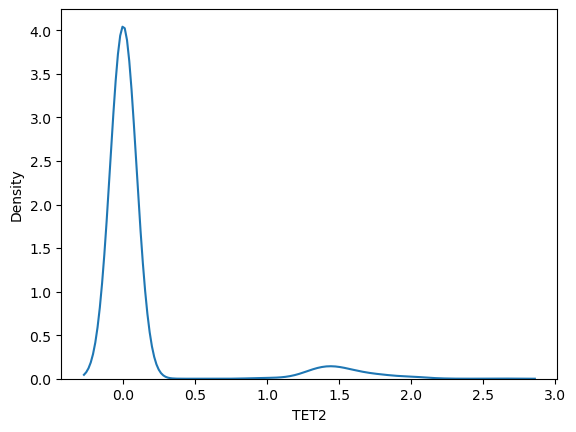

In [98]:
sns.kdeplot(df['TET2'])

In [89]:
df

TET2  Samplepair Sample
AAAGCAAAGGCGATAC-1-111   0.0           1   EG46
AACGTTGCATTTGCTT-1-111   0.0           1   EG46
AACGTTGTCTCGCATC-1-111   0.0           1   EG46
AATCCAGAGAAGGCCT-1-111   0.0           1   EG46
ACACCAATCGCAAGCC-1-111   0.0           1   EG46
...                      ...         ...    ...
TGGACGCGTGTTCTTT-1-116   0.0           2   EG49
TTAGGACTCCAGTATG-1-116   0.0           2   EG49
TTCCCAGCAACGATCT-1-116   0.0           2   EG49
TTGGCAACACACCGCA-1-116   0.0           2   EG49
TTTGGTTGTCTAGTCA-1-116   0.0           2   EG49

[1824 rows x 3 columns]